# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [63]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/tennis.csv")

points_df = df[['player1 total points won', 'player2 total points won']]

#Drop nans (Dropping missing values gives lower AIC and BIC values compared to filling the missing values with the mean)
points_df = points_df.dropna()

In [64]:
x = points_df['player1 total points won']
y = points_df['player2 total points won']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.196e+04
Date:                      Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                              16:53:09   Log-Likelihood:                         -4173.8
No. Observations:                      1027   AIC:                                      8350.
Df Residuals:                          1026   BIC:                                      8355.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8618      0.005    178.783      0.000       0.852       0.871
==============================================================================
Omnibus:                       70.330   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.878
Skew:                           0.698   Prob(JB):                     6.11e-19
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

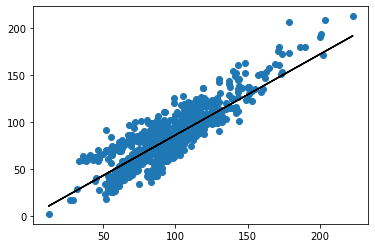

In [66]:
x = points_df['player1 total points won']
# x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
yfit = est.predict(x)
fig, ax = plt.subplots()
ax.scatter(points_df['player1 total points won'], y)
ax.plot(points_df['player1 total points won'], yfit, 'black')

Given that the p-value is less than 0.05, it can be said that for every point scored by Federer, his opponents score 0.8618 (as per the coeff).

In regression, the constant term is the value at which the fitted line crosses the y-axis. As shown in the figure above, the value of y at the y-intercept is negative - which suggests that if Federer scores 0 points, his opponent will have a negative score. Based on this, there is no need to utilize a constant term for this example as first of all it is extremely unlikely for someone to have 0 points in a tennis match and impossible for someone to have negative points in a tennis match. 

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


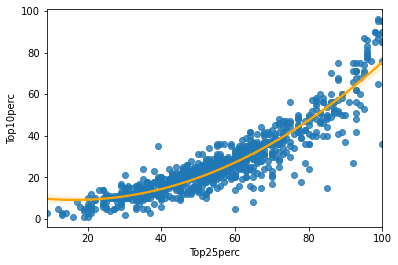

In [3]:
df = pd.read_csv('data/college.csv')
sns.regplot(x="Top25perc", y="Top10perc", data=df, order=2,
            line_kws={"color": "orange"})

In [4]:
df['Top25perc2'] = df['Top25perc'] ** 2
df['Top10perc2'] = df['Top10perc'] ** 2

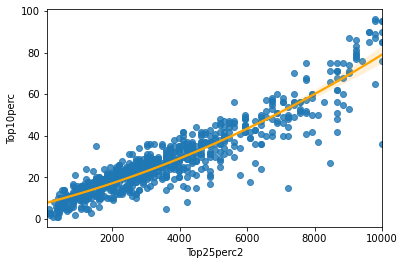

In [14]:
#Try again with polynomial fit
sns.regplot(x="Top25perc2", y="Top10perc", data=df, order=2,
            line_kws={"color": "orange"})

As it can be seen, having a polynomial degree of 2 for x gives a better fit 

In [24]:
#Do private schools see more admissions overall?

df['Private'] = df['Private'].replace("Yes", 1).replace("No", 0)
X = df['Private']
y = df['Enroll']
est = sm.OLS(y, X).fit()
est.summary()
#Can be seen that private schools enroll 456.9 more enrollments with a std error of +-48.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Enroll   R-squared (uncentered):                   0.103
Model:                            OLS   Adj. R-squared (uncentered):              0.102
Method:                 Least Squares   F-statistic:                              89.34
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                    3.83e-20
Time:                        13:36:45   Log-Likelihood:                         -6577.3
No. Observations:                 777   AIC:                                  1.316e+04
Df Residuals:                     776   BIC:                                  1.316e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Private      456.9451     48.344      9.452      0.000     362.045     551.846
==============================================================================
Omnibus:                      394.474   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2089.188
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       9.523   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [56]:
import numpy as np
df = pd.read_csv('data/auto.csv', delim_whitespace=True)
df = df.drop(df.index[0]) #remove first row that has NaNs only
df['horsepower'] = df['horsepower'].replace("?", 0).astype("float")
df['mpg'] = df['mpg'].astype("float")

In [57]:
X = df['horsepower']
y = df['mpg']
est = sm.OLS(y, X).fit()
est.summary()
#Lets try to get a better r square value

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              695.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                    3.14e-89
Time:                        16:51:13   Log-Likelihood:                         -1636.4
No. Observations:                 397   AIC:                                      3275.
Df Residuals:                     396   BIC:                                      3279.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1788      0.007     26.377      0.000       0.166       0.192
==============================================================================
Omnibus:                       11.258   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.130
Skew:                          -0.234   Prob(JB):                       0.0172
Kurtosis:                       2.478   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Polynomial fit gives better r squared value
df['horsepower2'] = df['horsepower'] ** 2
X2 = df[['horsepower2', 'horsepower']]
est = sm.OLS(y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1354.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                   1.61e-177
Time:                        16:51:14   Log-Likelihood:                         -1428.6
No. Observations:                 397   AIC:                                      2861.
Df Residuals:                     395   BIC:                                      2869.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
horsepower2    -0.0024   8.79e-05    -27.027      0.000      -0.003      -0.002
horsepower      0.4980      0.012     39.919      0.000       0.474       0.523
==============================================================================
Omnibus:                       62.357   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.236
Skew:                           1.035   Prob(JB):                     2.54e-20
Kurtosis:                       4.083   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i) p-value < 0.05 inidcates a relationship between the dependent and independent variable
ii) r-squared value of 0.873 indicates a pretty strong relationship between the variables.

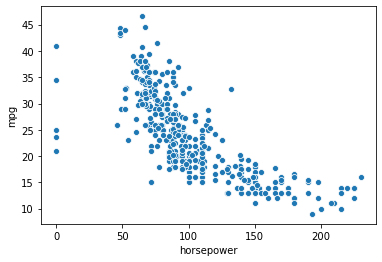

In [59]:
sns.scatterplot(X, y)
# iii) can be seen that it is a negative relationship (the higher the horsepower, the lower the mpg)

In [60]:
# iv)

print(est.predict([0,98]))
print(est.conf_int())

[48.80689643]
                    0         1
horsepower2 -0.002549 -0.002203
horsepower   0.473502  0.522557


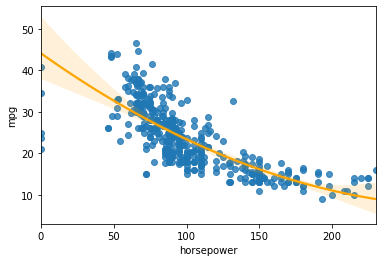

In [61]:
# v) Make a regression plot the response and the predictor.

sns.regplot(x="horsepower", y="mpg", data=df, order=2,
            line_kws={"color": "orange"})

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [40]:
df = pd.read_csv('data/auto.csv', delim_whitespace=True)
df = df.drop(df.index[0]) #remove first row that has NaNs only
df['horsepower'] = df['horsepower'].replace("?", 0).astype("float")
df['mpg'] = df['mpg'].astype("float")

X = df.drop(columns=['mpg', 'name'])
y = df['mpg']
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2968.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:28:45   Log-Likelihood:                         -1044.9
No. Observations:                 397   AIC:                                      2104.
Df Residuals:                     390   BIC:                                      2132.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6816      0.323     -2.108      0.036      -1.317      -0.046
displacement     0.0210      0.008      2.769      0.006       0.006       0.036
horsepower      -0.0315      0.011     -2.963      0.003      -0.052      -0.011
weight          -0.0063      0.001     -9.926      0.000      -0.008      -0.005
acceleration    -0.0485      0.086     -0.564      0.573      -0.218       0.121
year             0.5768      0.023     24.815      0.000       0.531       0.622
origin           1.2993      0.280      4.640      0.000       0.749       1.850
==============================================================================
Omnibus:                       46.266   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.808
Skew:                           0.672   Prob(JB):                     8.56e-20
Kurtosis:                       4.871   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) Prob F statistic is the goodness-of-fit test, which tests the hypothesis that none of those variables have a relationship with the response variable. For this situation the prob F stat < 0.05 so it suggests a relationship between the response and predictors

ii) Aside from acceleration which as a p-value > 0.05, all X variables have p-value < 0.05 so they are statistically signinficant.

iii) it suggests that mpg goes up by 0.5768 every year

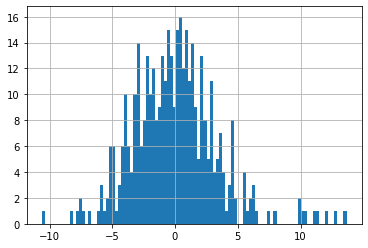

In [21]:
# iv) Can see some outliers but nothing too unusual
est.resid.hist(bins=100)

In [45]:
# v) Is there heteroscedasticity in the fit?
#https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan
from statsmodels.stats.diagnostic import het_breuschpagan
HBP_test = het_breuschpagan(est.resid, X)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'] # labelling the output numbers
print(dict(zip(labels, HBP_test)))

#Heteroskedasticity is indicated if p < 0.05, so according to these tests, this model is NOT heteroskedastic.

{'LM Statistic': 102.57795110713982, 'LM-Test p-value': 7.268252692590128e-20, 'F-Statistic': 19.41110490012561, 'F-Test p-value': 2.785363293228201e-22}


# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [54]:
df = pd.read_csv('data/carseats.csv')
df['Urban'] = df['Urban'].replace("Yes", 1).replace("No", 0)
df['US'] = df['US'].replace("Yes", 1).replace("No", 0)

In [51]:
# 1) 

X = df[['Price', 'Urban', 'US']]
y = df['Sales']
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              564.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                   9.52e-143
Time:                        16:45:47   Log-Likelihood:                         -1067.7
No. Observations:                 400   AIC:                                      2141.
Df Residuals:                     397   BIC:                                      2153.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0406      0.003     12.841      0.000       0.034       0.047
Urban          1.2917      0.374      3.457      0.001       0.557       2.026
US             2.1948      0.360      6.091      0.000       1.486       2.903
==============================================================================
Omnibus:                        1.426   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.214
Skew:                           0.121   Prob(JB):                        0.545
Kurtosis:                       3.120   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

Price - goes up by 0.0406 every time Sales go up by 1
Urban - sales are 1.2917 more in urban areas
US - Sales are 2.1948 more when in the US

**3) For which of the predictors can you reject the null hypothesis H0 : βj = 0?**

- All three of Price, Urban and US have p-values < 0.05 so the null hypothesis cannot be rejected for any of the predictors

In [52]:
#4)

df['ShelveLoc'] = df['ShelveLoc'].replace("Bad", 1).replace("Good", 0).replace("Medium", 0)

X = df.drop(columns=['Sales'])
y = df['Sales']
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              857.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):                   1.69e-258
Time:                        16:45:49   Log-Likelihood:                         -772.81
No. Observations:                 400   AIC:                                      1566.
Df Residuals:                     390   BIC:                                      1606.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CompPrice       0.1277      0.005     23.263      0.000       0.117       0.139
Income          0.0234      0.003      7.955      0.000       0.018       0.029
Advertising     0.1108      0.018      6.008      0.000       0.075       0.147
Population      0.0018      0.001      3.136      0.002       0.001       0.003
Price          -0.0931      0.004    -20.997      0.000      -0.102      -0.084
ShelveLoc      -2.6952      0.200    -13.465      0.000      -3.089      -2.302
Age            -0.0321      0.005     -6.525      0.000      -0.042      -0.022
Education       0.1057      0.029      3.695      0.000       0.049       0.162
Urban           0.2073      0.187      1.109      0.268      -0.160       0.575
US              0.2521      0.247      1.021      0.308      -0.233       0.738
==============================================================================
Omnibus:                        9.735   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.880
Skew:                           0.307   Prob(JB):                       0.0118
Kurtosis:                       2.605   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I know the question is asking for a smaller model however using the whole dataset gives a better r-squared value and prob f-stat for Sales. So I went with that that approach. Compared to the model from 1, this one has better r-squared value and f-stat with lower AIC and BIC

**5) How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.**

- The model from #4 fits the data better as can be seen by more preferable r-squared and f-stat values. The AIC and BIC is also lower for the model from #4. That being said, the model from #1 still has good r-squared and f-stat values.

In [53]:
# 6) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

est.conf_int()

,0,1
CompPrice,0.116936,0.138527
Income,0.017581,0.029123
Advertising,0.074542,0.147052
Population,0.000689,0.003003
Price,-0.101782,-0.084354
ShelveLoc,-3.088705,-2.301647
Age,-0.041735,-0.022408
Education,0.049469,0.161971
Urban,-0.160127,0.574686
US,-0.233397,0.737690
